In [1]:
!git clone https://github.com/RAVIKUMAR-CEO/TREESPECIES.git
repo_path = "TREESPECIES"

Cloning into 'TREESPECIES'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (197/197), done.
remote: Total 200 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (200/200), 14.82 MiB | 20.65 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [5]:
import os

Repo_path = repo_path
print("Files in TREESPECIES:", os.listdir(Repo_path))

Files in TREESPECIES: ['coconut', 'bamboo', 'README.md', '.git', 'gulmohor', 'babul', 'champa', 'gunda', 'cactus', 'amla', 'banyan', 'treeeeee.ipynb', 'bili', 'asopalav', 'garmalo']


In [6]:
!ls TREESPECIES

amla	  babul   banyan  cactus  coconut  gulmohor  README.md
asopalav  bamboo  bili	  champa  garmalo  gunda     treeeeee.ipynb


In [7]:
class_dirs = os.listdir(Repo_path)
print(f"Number of classes: {len(class_dirs)}")


Number of classes: 15


In [9]:
import glob
import os

image_paths = []
labels = []

for class_name in os.listdir(Repo_path):
    class_folder = os.path.join(Repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            # Assuming image files have extensions like .jpg, .jpeg, .png, etc.
            # You might want to add more extensions or a more robust check
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(class_folder, img_file))
                labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 184


In [13]:
import pandas as pd
import os

class_counts = {}
for cls in class_dirs:
    class_path = os.path.join(Repo_path, cls)
    if os.path.isdir(class_path):
        class_counts[cls] = len(os.listdir(class_path))

class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

         Image Count
coconut           50
champa            50
amla              18
bamboo            16
bili              15
shape:  (13, 1)


No image files found in TREESPECIES/.git


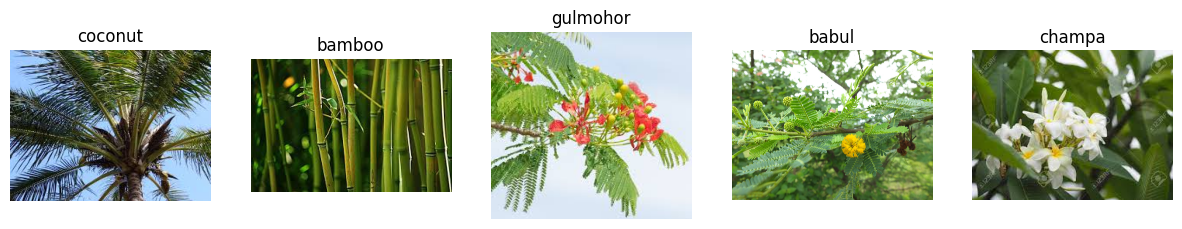

In [17]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(dataset_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    image_count = 0  # Keep track of how many images we've displayed
    for i, class_dir in enumerate(class_dirs):
        if image_count >= n:  # Stop if we've displayed n images
            break
        class_folder_path = os.path.join(dataset_path, class_dir)
        if os.path.isdir(class_folder_path): # Check if it's a directory
            # List files in the class folder and get the first image file
            img_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
            if img_files:
                img_path = os.path.join(class_folder_path, img_files[0])
                img = Image.open(img_path)
                plt.subplot(1, n, image_count + 1) # Use image_count for subplot index
                plt.imshow(img)
                plt.title(class_dir)
                plt.axis('off')
                image_count += 1 # Increment image_count after displaying an image
            else:
                print(f"No image files found in {class_folder_path}")
    plt.show()

show_sample_images(Repo_path, class_dirs)

In [19]:
image_shapes = []

for class_dir in class_dirs:
    class_folder_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_folder_path): # Check if it's a directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    img = Image.open(img_path)
                    image_shapes.append(img.size)
                except Exception as e:
                    print(f"Could not open image file {img_path}: {e}")


# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
display(shapes_df.head())

,Width,Height
0,259,195
1,290,174
2,262,192
3,290,174
4,225,225


In [20]:

print(shapes_df.describe())

             Width       Height
count   184.000000   184.000000
mean    309.184783   298.391304
std     353.906426   387.958027
min     150.000000   148.000000
25%     208.000000   191.500000
50%     259.000000   219.500000
75%     275.000000   259.000000
max    4000.000000  3000.000000


In [22]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    class_folder_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_folder_path):  # Check if it's a directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not process image file {img_path}: {e}")


# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 8


In [24]:
corrupt_images = []

for class_dir in class_dirs:
    class_folder_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_folder_path): # Check if it's a directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    img = Image.open(img_path)
                    img.verify()
                except Exception as e:
                    corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


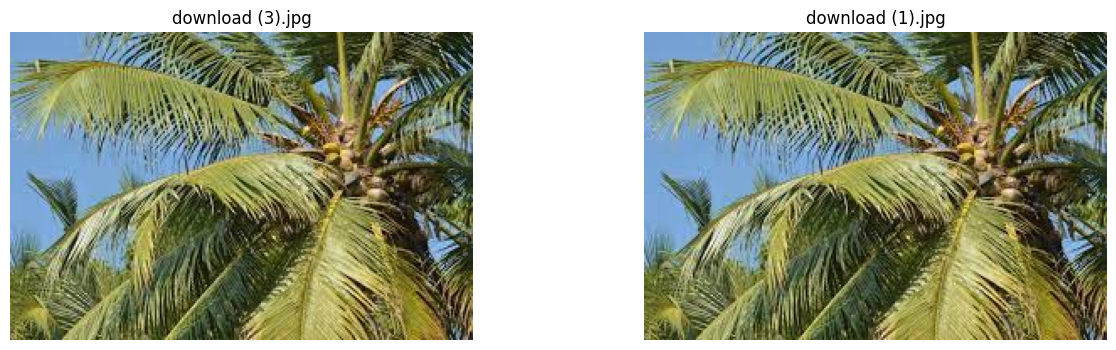

Duplicate set 2:


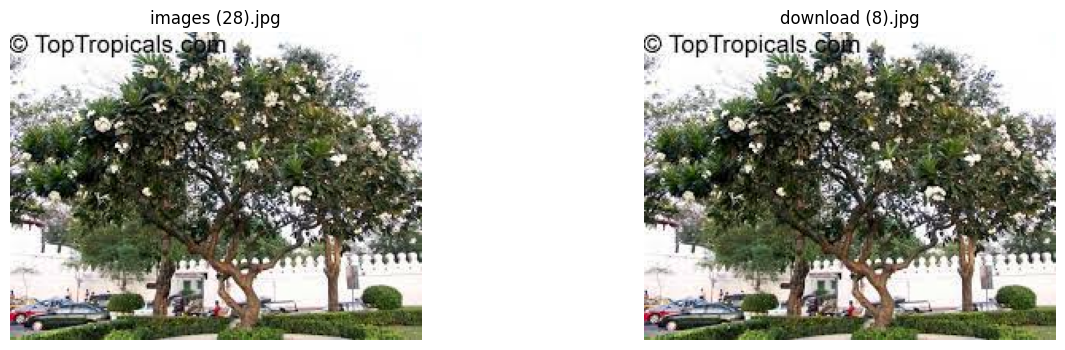

Duplicate set 3:


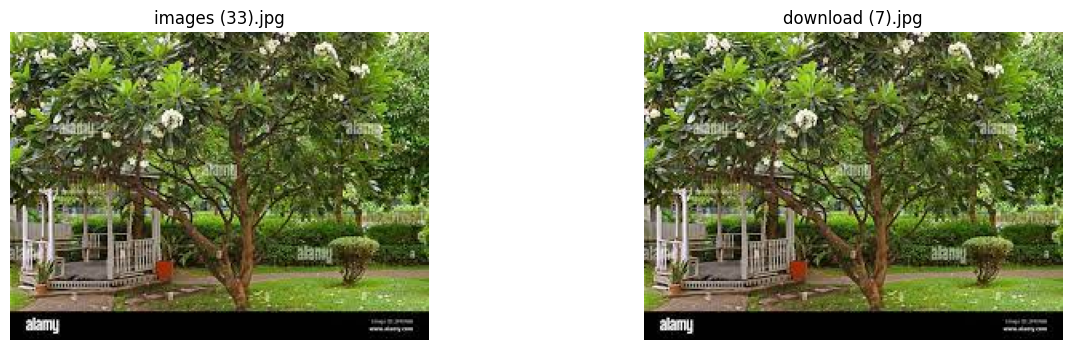

In [25]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [26]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 8 duplicate images.


In [28]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    class_folder_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_folder_path): # Check if it's a directory
        for img_file in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    with open(img_path, 'rb') as f:
                        file_hash = hashlib.md5(f.read()).hexdigest()
                        hashes[file_hash].append(img_path)
                except Exception as e:
                    print(f"Could not process image file {img_path}: {e}")

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [30]:
from PIL import Image
import pandas as pd
import os

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_path): # Check if it's a directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_dir
                        })
                except Exception as e:
                    print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 2
🔺 Very large images: 6


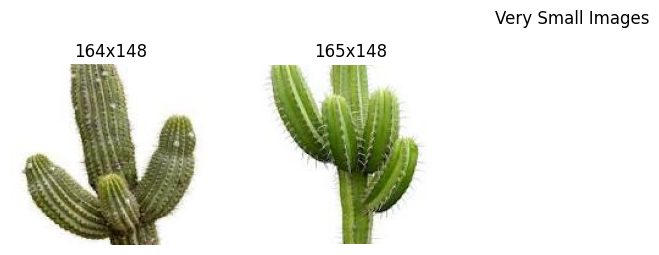

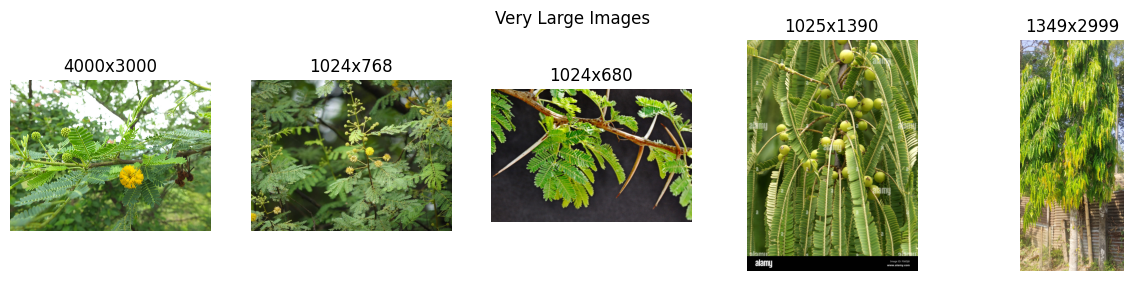

In [31]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [32]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 8 outlier images (small + large).


In [34]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(Repo_path, class_dir)
    if os.path.isdir(class_path): # Check if it's a directory
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            # Check if it's a file and has an image extension
            if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                try:
                    with Image.open(img_path) as img:
                        width, height = img.size
                        image_info.append({
                            'path': img_path,
                            'width': width,
                            'height': height,
                            'class': class_dir
                        })
                except Exception as e:
                    print(f"Could not process image file {img_path}: {e}")


df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count   168.000000   168.000000
mean    257.434524   240.928571
std     112.769844   134.780885
min     150.000000   152.000000
25%     205.500000   190.000000
50%     249.500000   219.500000
75%     275.000000   256.250000
max    1000.000000  1247.000000


In [48]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Define image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,215,216 (16.08 MB)

 Trainable params: 165,645 (647.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image dimensions and batch size
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Define the path to your dataset
data_dir = Repo_path

# Use ImageDataGenerator for data augmentation and preprocessing
# We'll split the data into training and validation sets using validation_split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # Use 20% of the data for validation
    # Add other augmentation parameters as needed
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True,
    # fill_mode='nearest'
)

# Create the training data generator
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical', # Use 'categorical' for one-hot encoding of labels
    subset='training' # Specify 'training' subset
)

# Create the validation data generator
val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' # Specify 'validation' subset
)

print("Training data generator created with", train_gen.num_classes, "classes")
print("Validation data generator created with", val_gen.num_classes, "classes")

Found 138 images belonging to 13 classes.
Found 30 images belonging to 13 classes.
Training data generator created with 13 classes
Validation data generator created with 13 classes


In [41]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,215,216 (16.08 MB)

 Trainable params: 165,645 (647.05 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [42]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.1694 - loss: 2.4332 - val_accuracy: 0.3000 - val_loss: 1.8593
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.3580 - loss: 2.0096 - val_accuracy: 0.3000 - val_loss: 1.7881
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2917 - loss: 1.9345 - val_accuracy: 0.3000 - val_loss: 1.7856
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2587 - loss: 1.9535 - val_accuracy: 0.3000 - val_loss: 1.7714
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2636 - loss: 2.0328 - val_accuracy: 0.3000 - val_loss: 1.7815
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2633 - loss: 2.0103 - val_accuracy: 0.3000 - val_loss: 1.7987
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.2771 - loss: 2.0491 - val_accuracy: 0.3000 - val_loss: 1.7991
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.2705 - loss: 1.9678 - val_accuracy: 0.3000 - val_loss: 1.8040
Epoch 9/

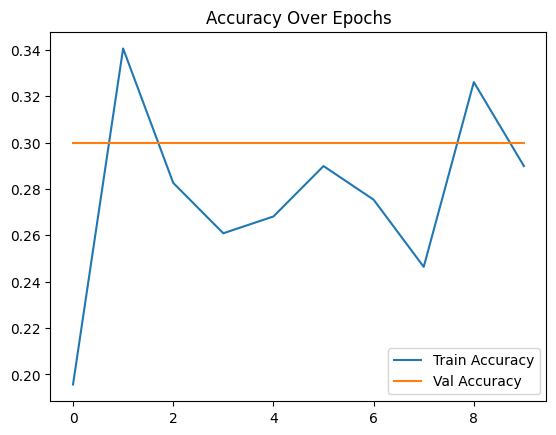

In [43]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os # Import os for os.path.join

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    Repo_path, # Corrected from dataset_path to Repo_path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    Repo_path, # Corrected from dataset_path to Repo_path
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 138 images belonging to 13 classes.
Found 30 images belonging to 13 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 4s/step - accuracy: 0.1288 - loss: 5.4978 - val_accuracy: 0.3000 - val_loss: 2.3509
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step - accuracy: 0.2718 - loss: 2.2516 - val_accuracy: 0.3000 - val_loss: 1.8382
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 24s 4s/step - accuracy: 0.2651 - loss: 2.0993 - val_accuracy: 0.3000 - val_loss: 1.7964
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.2684 - loss: 2.0320 - val_accuracy: 0.4667 - val_loss: 1.8253
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.2810 - loss: 1.9573 - val_accuracy: 0.3000 - val_loss: 1.7258
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 21s 4s/step - accuracy: 0.3235 - loss: 1.8636 - val_accuracy: 0.4667 - val_loss: 1.6839
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 4s/step - accuracy: 0.3554 - loss: 1.7854 - val_accuracy: 0.4000 - val_loss: 1.8267
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4038 - loss: 1.8655 - val_accuracy: 0.4667 - val_loss: 1.5984
Epoch 9/

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


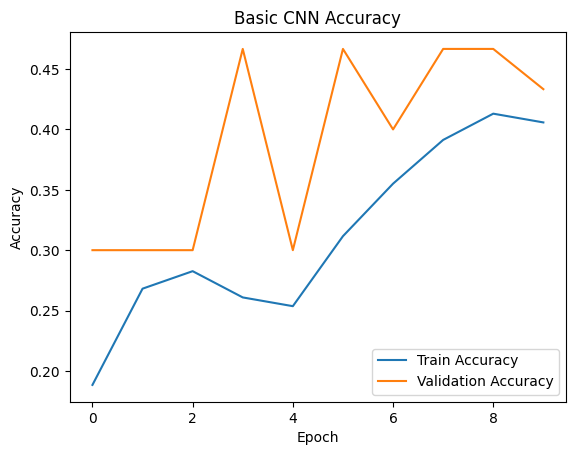

In [46]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Use train_generator.num_classes for the correct number of classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")
print("✅ Improved CNN model saved as 'improved_cnn_model.h5'")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 9s/step - accuracy: 0.2164 - loss: 5.7078 - val_accuracy: 0.3333 - val_loss: 2.3863
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.5705 - loss: 3.7931 - val_accuracy: 0.1000 - val_loss: 2.8083
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 29s 5s/step - accuracy: 0.4278 - loss: 3.3573 - val_accuracy: 0.1000 - val_loss: 3.9778
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step - accuracy: 0.6035 - loss: 1.7395 - val_accuracy: 0.1000 - val_loss: 5.7360
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 6s/step - accuracy: 0.5943 - loss: 1.8448 - val_accuracy: 0.1000 - val_loss: 7.6467
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 6s/step - accuracy: 0.6255 - loss: 1.4434 - val_accuracy: 0.1000 - val_loss: 9.6212
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 5s/step - accuracy: 0.6359 - loss: 1.5729 - val_accuracy: 0.1000 - val_loss: 11.5211
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.6739 - loss: 1.1386 - val_accuracy: 0.1000 - val_loss: 13.0943
Epoch 

✅ Improved CNN model saved as 'improved_cnn_model.h5'
